# Clasificadores Binarios

utilizaremos los siguientes clasificadores:

* K-NN
* arbol de decision
* SVC
* regresion logistica
* MLP

El dataset utilizado esl el 'dataset1' que contiene mediciones a las 14 y 19 hrs, el cual normalizamos en un intervalo [0,1]

Ademas se equilibia la cantidad de datos, borrando mediciones

In [1]:
import glob
import pandas as pd
import numpy as np
from datetime import date, datetime, time, timedelta
from collections import defaultdict
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
import seaborn as sns
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [2]:
data = "../data/processed/dataset1.csv"
df = pd.read_csv(data)
df.head()

,code,Fecha,T_14,Hum_14,DVin_14,VVin_14,Prec_14,RadSol_14,PATM_14h,T_19,Hum_19,DVin_19,VVin_19,Prec_19,RadSol_19,PATM_19h,Target
0,13,2010-06-11,7.2,66.7,61.4,0.0,0.0,146.0,1006.0,3.8,84.7,146.5,0.0,0.0,0.0,1005.0,True
1,13,2010-06-12,14.0,48.6,315.7,0.0,0.0,246.3,1008.0,9.7,66.0,266.1,0.0,0.0,0.0,1013.0,False
2,13,2010-06-13,8.6,82.4,228.0,0.0,0.0,118.5,1011.0,6.3,95.5,141.3,0.0,0.0,0.0,1011.0,False
3,13,2010-06-14,6.0,84.9,53.2,0.0,0.2,53.6,1014.0,3.7,94.2,114.6,0.0,0.4,0.0,1019.0,False
4,13,2010-06-15,0.8,89.7,240.3,0.0,0.0,39.6,1026.0,0.7,89.3,144.7,0.0,0.0,0.0,1027.0,True


In [3]:
# debemos equilibrar la cantidad de datos, por ahora lo que haremos sera reducir dias no helados.

nofrost = df[df["Target"] == False].values
np.random.seed(3453)
np.random.shuffle(nofrost)
print(len(nofrost))
nofrost = nofrost[:20000]
frost = df[df["Target"]].values
print("luego de emparejar, tenemos:")
print(len(nofrost), "dias sin heladas")
print(len(frost), "dias con heladas")

data = np.concatenate((nofrost, frost))
np.random.seed(2345362)
np.random.shuffle(data)

52845
luego de emparejar, tenemos:
20000 dias sin heladas
3005 dias con heladas


In [4]:
X = data[:,2:-1]
y = data[:,-1].astype(float)

In [5]:
# normalize data
X_scaled = preprocessing.scale(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1, stratify=y)

# KNN

In [17]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train) 
print("Score KNN:", knn.score(X_test, y_test))

Score KNN: 0.911323625298848


In [330]:
knn.predict(X_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [21]:
y_pred = (knn.predict_proba(X_test)[:,1] > 0.5).astype(int)

In [354]:

#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=10)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.87589654 0.87850467 0.87633123 0.87720061 0.87307107]
cv_scores mean:0.8762008259074114


In [353]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3987   13]
 [ 516   85]]
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      4000
         1.0       0.87      0.14      0.24       601

    accuracy                           0.89      4601
   macro avg       0.88      0.57      0.59      4601
weighted avg       0.88      0.89      0.85      4601



In [343]:
help(confusion_matrix)

Help on function confusion_matrix in module sklearn.metrics.classification:

confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)
    Compute confusion matrix to evaluate the accuracy of a classification
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` but
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array, shape = [n_samples]
        Ground truth (correct) target values.
    
    y_pred : array, shape = [n_samples]
        Estimated targets as returned by a classifier.
    
    labels : array, shape = [n_classes], optional
        List of labels to index the m

In [28]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

#     if target_names is not None:
#         tick_marks = np.arange(len(target_names))
#         plt.xticks(tick_marks, target_names, rotation=45)
#         plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

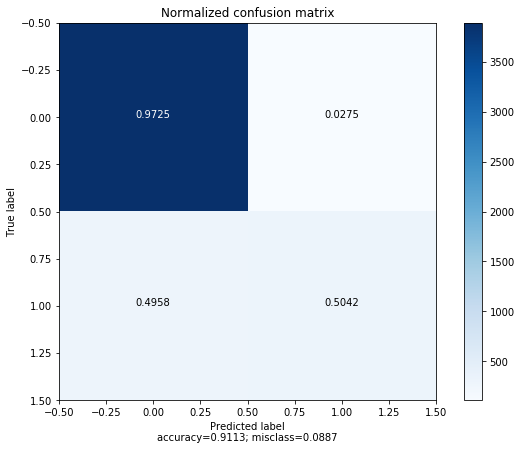

In [29]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, ["No-Heladas", "Heladas"], normalize=True,
                      title='Normalized confusion matrix')

## ARBOL DE DESICION


In [355]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_leaf=20)
clf = clf.fit(X_train, y_train)

In [356]:
clf.score(X_test, y_test)

0.9067594001304065

In [357]:
clf_cv = tree.DecisionTreeClassifier()
#train model with cv of 5 
cv_scores = cross_val_score(clf_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.8885025  0.88785047 0.88980656 0.88393827 0.88067811]
cv_scores mean:0.886155183655727


# REGRESION LOGISTICA

In [232]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8609898107714702

In [233]:
logreg_cv = LogisticRegression()
#train model with cv of 5 
cv_scores = cross_val_score(logreg_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.87700146 0.85080058 0.85225619 0.8580786  0.80772032]
cv_scores mean:0.8491714294498495


/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# SVC

In [6]:
from sklearn.svm import SVC
svc = SVC(probability=True)
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

/usr/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9184959791349706

In [ ]:
svc_cv = SVC(probability=True)
#train model with cv of 5 
cv_scores = cross_val_score(svc_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

/usr/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# MLP

In [6]:
from sklearn.neural_network import MLPClassifier
reg = MLPClassifier(hidden_layer_sizes=(100), alpha=0.01, max_iter=1000, early_stopping=True)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.9169745707454902

In [7]:
reg_cv = MLPClassifier(hidden_layer_sizes=(500), alpha=0.001, max_iter=1000, early_stopping=True)
#train model with cv of 5 
cv_scores = cross_val_score(reg_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.91154097 0.90502065 0.91132363 0.91262769 0.90545534]
cv_scores mean:0.9091936535535755


In [238]:
print(confusion_matrix(y_test, reg.predict(X_test)))
print(classification_report(y_test, reg.predict(X_test)))

[[690  83]
 [ 68 533]]
              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90       773
         1.0       0.87      0.89      0.88       601

    accuracy                           0.89      1374
   macro avg       0.89      0.89      0.89      1374
weighted avg       0.89      0.89      0.89      1374



# analisis de resultados

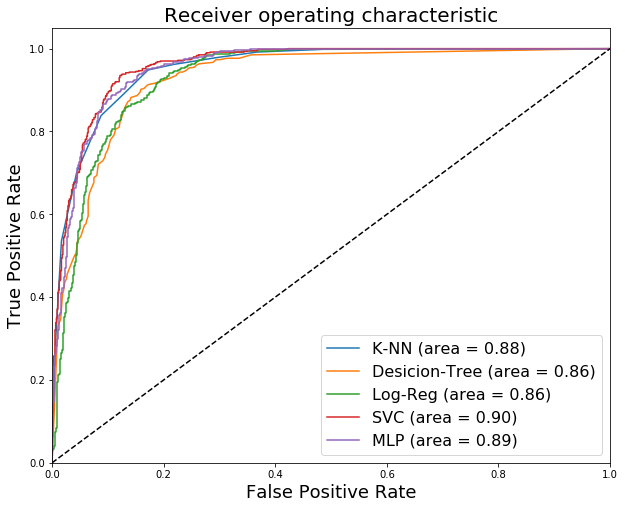

In [239]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

plt.figure(figsize=(10,8))
for classifier, label in zip([knn, clf, logreg, svc, reg],
                            ["K-NN", "Desicion-Tree", "Log-Reg", "SVC", "MLP"]):
    cl_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
    plt.plot(fpr, tpr, label='%s (area = %0.2f)' % (label,cl_roc_auc))

plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic', fontsize=20)
plt.legend(loc="lower right", fontsize=16)
plt.savefig('Log_ROC')
plt.show()
    

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


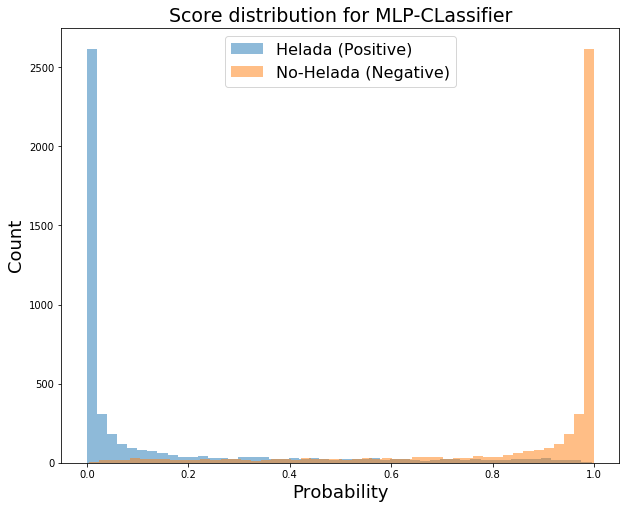

In [13]:
plt.figure(figsize=(10, 8))
# sns.distplot(svc.predict_proba(X_test)[:,0], hist=False, kde=True, bins=100, label="No-Helada")
plt.hist(reg.predict_proba(X_test)[:,1], bins=50, normed=False, alpha=0.5, label="Helada (Positive)")
# sns.distplot(svc.predict_proba(X_test)[:,1], hist=False, kde=True, bins=100,label="Helada")
plt.hist(reg.predict_proba(X_test)[:,0], bins=50, normed=False, alpha=0.5, label="No-Helada (Negative)")

plt.xlabel("Probability", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.title("Score distribution for MLP-CLassifier", fontsize=19)
plt.legend(fontsize=16, loc="upper center")

In [242]:
(logreg.predict_proba(X_test)[:,1] > 0.9).astype(int)

array([0, 0, 0, ..., 0, 1, 0])